<a href="https://colab.research.google.com/github/lcnature/PSY292_2024Fall/blob/main/HW_Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 approximate cumulative probability distribution by Monte Carlo simulation


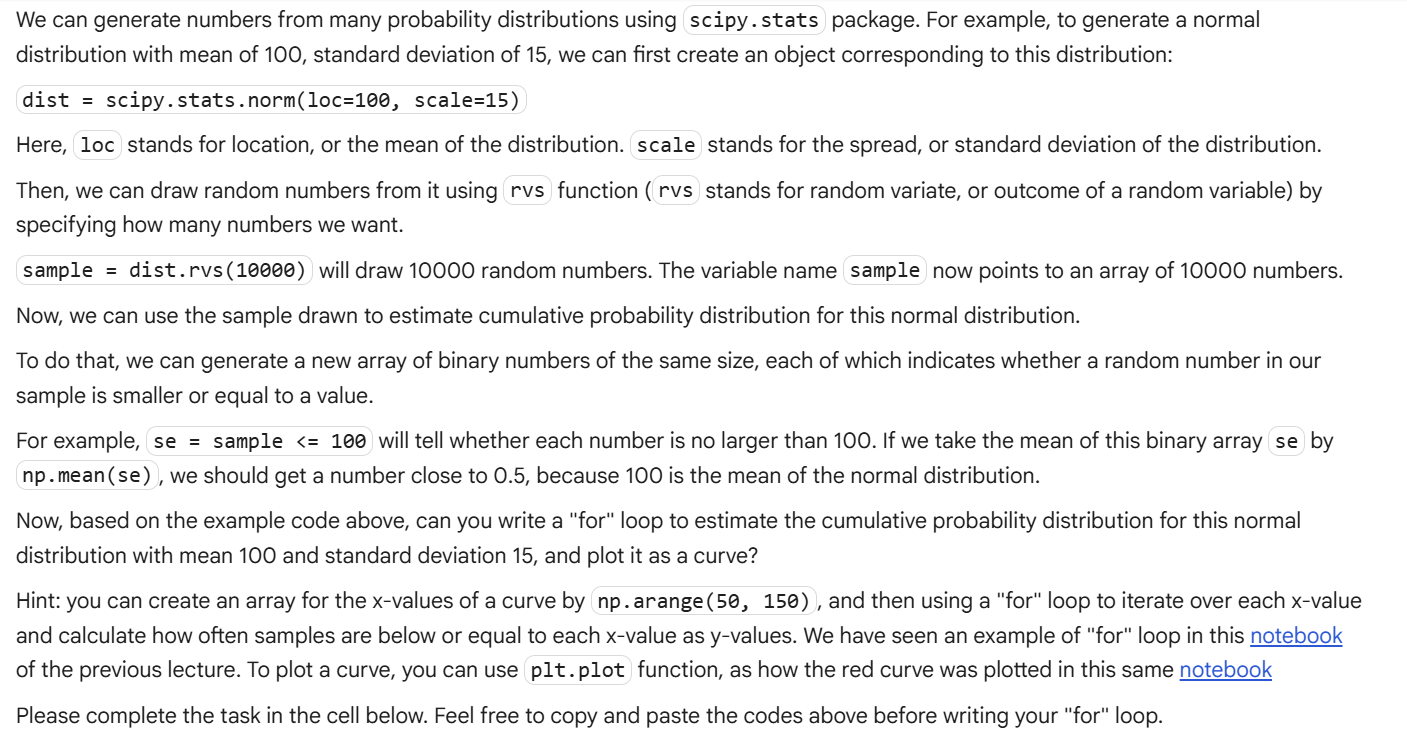

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt



## Task 2 Using bootstrap to estimate the distribution of medians of samples

In [ ]:
! pip install nhanes
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()

nhanes_data = nhanes_data.dropna(subset=['TotalSaturatedFattyAcidsGm_DR2TOT'])


By running the code above, you should have got a dataset with no missing value in the column of 'TotalSaturatedFattyAcidsGm_DR2TOT'.

In the [notebook](https://colab.research.google.com/github/lcnature/statsthinking21-python/blob/master/notebooks/07-ResamplingAndSimulation.ipynb) we discussed in class, bootstrap was demonstrated for the mean of a sample.

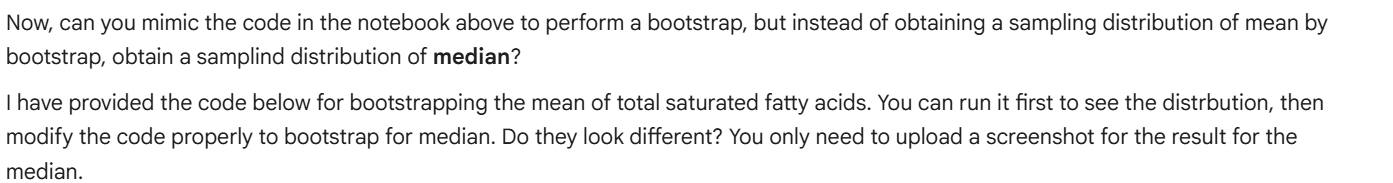

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

num_runs = 5000
sample_size = 100



# Take a sample for which we will perform the bootstrap

nhanes_sample = nhanes_data.sample(sample_size)

# Perform the resampling

bootstrap_df = pd.DataFrame({'mean': np.zeros(num_runs)})
for sampling_run in range(num_runs):
    bootstrap_sample = nhanes_sample.sample(sample_size, replace=True)
    bootstrap_df.loc[sampling_run, 'mean'] = bootstrap_sample['TotalSaturatedFattyAcidsGm_DR2TOT'].mean()


hist = plt.hist(bootstrap_df['mean'], 100, density=True)

plt.xlabel('Bootstrapped mean of total saturated fatty acids')
plt.show()

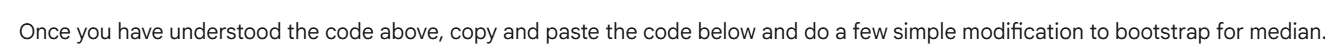